In [58]:
# Magic home
%cd /home/benjamin/git/swiss-river-network-benchmark/


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from swissrivernetwork.gbr25.graph_exporter import plot_graph
from swissrivernetwork.benchmark.train_isolated_station import read_graph, read_stations

# nicer labels for plots
label = dict()
label['lstm'] = 'LSTM'
label['graphlet'] = 'Graphlet'
label['lstm_embedding'] = 'LSTM-E'
label['stgnn'] = 'ST-GNN'
label['swiss-1990'] = 'Swiss-1990'
label['swiss-2010'] = 'Swiss-2010'
label['zurich'] = 'Zurich'
    
# Variables
GRAPH_NAMES = ['swiss-1990', 'swiss-2010']
#METHODS = ['concatenation', 'graphlet', 'lstm_embedding', 'stgnn']
EXPORT_PGF = False
#FIGURE_SIZE = (10, 4)
FIGURE_SIZE = (3, 3)
DPI = 300


/home/benjamin/git/swiss-river-network-benchmark


In [59]:
# Setup helper

def show(filename, export_png=False):
    if EXPORT_PGF or export_png:
        plt.savefig(f"swissrivernetwork/benchmark/visualize_results/figures/{filename}", dpi=DPI, bbox_inches='tight')
    else:
        plt.show()


# Setup PGF:
if EXPORT_PGF:
    mpl.use("pgf")

    # Optional: Configure fonts to match LaTeX document
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",  # or xelatex, lualatex
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    })
else:
    plt.rcParams['font.family'] = 'serif'

# Initialize nicer labels:
#methods_labels = [label[m] for m in METHODS]



['2056', '2386']


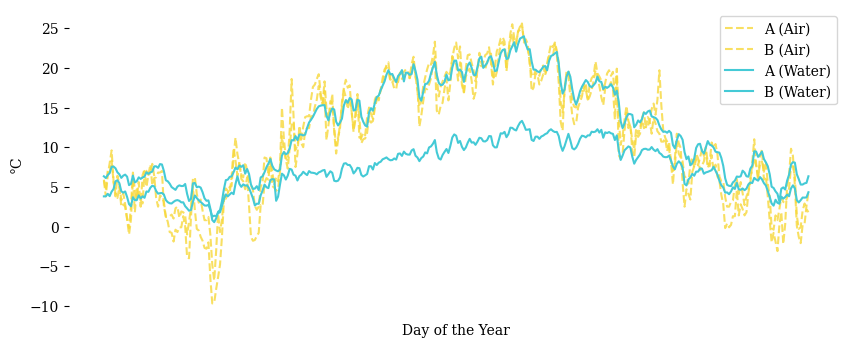

In [69]:
import random
from swissrivernetwork.benchmark.train_isolated_station import read_graph, read_stations, read_csv_test


# Plot two stations:
graph_name = 'swiss-2010'
stations = read_stations(graph_name)
stations = random.sample(stations, 2)

stations = ['2056', '2386']

df = read_csv_test(graph_name)
t = range(365)

def plot_at(station, linestyle, label):
    plt.plot(t, df[f'{station}_at'].iloc[:365], linestyle=linestyle, c='#f7d83b', label=label, alpha=0.8)
def plot_wt(station, linestyle, label):
    plt.plot(t, df[f'{station}_wt'].iloc[:365], linestyle=linestyle, c='#44cad6', label=label)

print(stations)

plt.figure(figsize=(10, 4))

plot_at(stations[0], 'dashed', f'A (Air)')
plot_at(stations[1], 'dashed', f'B (Air)')
plot_wt(stations[0], 'solid', f'A (Water)')
plot_wt(stations[1], 'solid', f'B (Water)')

plt.legend()
plt.xticks([])  # remove x-ticks
plt.xlabel('Day of the Year')
plt.ylabel('°C')
plt.box(False)  # remove plot box

show(f'dataset_overview_{stations[0]}vs{stations[1]}.png', export_png=True)

#print(df)




In [61]:
# Script to plot the datasets from a User view:

import torch

from swissrivernetwork_old.graph_preprocessing.gewaessernetz_processor import *


# (Same colors as Learnable Parameters:)
# Z-Order: (Swiss-2010, Swiss-1990, Zurich)
# or shapes? (1990 and 2010), (2010 only), (Zurich)
# square, circle, star

plt.figure(figsize=(10, 4))

# Preapre plot and add some river network:
gwn = GewaesserNetz('../data/gewaesser/gewaessernetz/gewaessernetz', types=['Bach', 'Bachachs', 'Bach_U', 'Fluss', 'See', 'Kanal', 'Fluss_U'])
gwn.read()
nodes, edges = gwn.edges()

print('start pruning...')
removed_edges = 1
while(removed_edges > 0):
    edges, removed_edges = prune_one_degree_edges(edges)
    nodes = prune_zero_degree_nodes(nodes)
print('pruning done.')

# remove stations
for e in edges:
    e.station = None

plot_edges(edges)
#for e in edges:




#colors = ['#4292c6', '#9ecae1', '#08519c'] # swapped
#colors = ['r', 'g', 'b']
colors = ['#44cad6', '#a5e2c5', '#08306b']
#colors = ['#44cad6', '#44cad6']
markers = ['o', 's']

for index,graph_name in enumerate(['swiss-2010', 'swiss-1990']): # swapped

    # Setup Graph
    stations = read_stations(graph_name)
    g,e = read_graph(graph_name)
    e = torch.tensor([])
    
    # Compute Colors
    information = dict()
    color = dict()
    for j,station in enumerate(stations):
        information[station] = f'j:{j}'
        color[station] = colors[index]

    # plot graph
    #ax = axes[index]  
    #plt.sca(ax)  
    ax = plt.gca()
    plot_graph(g, e, information, color, skipcolorbar=True, skipmargin=(index != 0), use_static_color=True)

    # add label:
    print(label[graph_name])
    ax.scatter(g[0,0], g[0,1], color=colors[index], s=50, edgecolors='k', zorder=3, linewidth=0.3, label=label[graph_name])


# QUICKFIX
# Get current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
# Swap positions — example: swap index 0 and 1
handles[0], handles[1] = handles[1], handles[0]
labels[0], labels[1] = labels[1], labels[0]

plt.legend(handles, labels)
show('dataset_overview_embedding.png', export_png=True)

    

created 247345 edges and 258191 nodes. discarded 5071 dublicates. discarded 11064 self loops.
start pruning...
pruning done.
min_color #44cad6 max_color #44cad6
margin ratio: (delta_x):  343811 delta y: 190540
Swiss-2010
min_color #a5e2c5 max_color #a5e2c5
Swiss-1990
Error in callback <function flush_figures at 0x789a30aeb100> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 